In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### 1. Ucitavanje podataka

In [2]:
df = pd.read_csv("data/Bank Marketing/bank-additional.csv", sep=";")

### 2. Analiza podataka

In [3]:
# tipovi podataka atributa
df.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration          float64
campaign          float64
pdays               int64
previous          float64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx      object
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [4]:
# deskriptiva statistika numerickih atributa
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,euribor3m,nr.employed
count,4119.000000,4116.000000,4114.000000,4119.000000,4117.000000,4116.000000,4117.000000,4117.000000,4118.000000
mean,40.113620,256.869048,2.534273,960.422190,0.190430,0.084694,93.579540,3.620753,5166.466731
std,10.313362,254.763913,2.566673,191.922786,0.541904,1.563361,0.579442,1.733796,73.670589
min,18.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,0.635000,4963.600000
25%,32.000000,103.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,1.334000,5099.100000
50%,38.000000,181.000000,2.000000,999.000000,0.000000,1.100000,93.749000,4.857000,5191.000000
75%,47.000000,317.250000,3.000000,999.000000,0.000000,1.400000,93.994000,4.961000,5228.100000
max,88.000000,3643.000000,35.000000,999.000000,6.000000,1.400000,94.767000,5.045000,5228.100000


In [5]:
# deskriptivna statictika kategorickih atributa
df.describe(include="object")

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,cons.conf.idx,y
count,4119,4119,4119,4119,4119,4119,4119,4119,4119,4119,4117,4119
unique,12,4,8,3,3,3,2,10,5,3,27,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,-36.4,no
freq,1012,2509,1264,3315,2175,3349,2652,1378,860,3523,758,3668


In [6]:
# brisanje duration kolone
df.drop("duration",axis=1, inplace=True)

# pregled nedostajucih vrednosti i tipova atributa
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4119 non-null   int64  
 1   job             4119 non-null   object 
 2   marital         4119 non-null   object 
 3   education       4119 non-null   object 
 4   default         4119 non-null   object 
 5   housing         4119 non-null   object 
 6   loan            4119 non-null   object 
 7   contact         4119 non-null   object 
 8   month           4119 non-null   object 
 9   day_of_week     4119 non-null   object 
 10  campaign        4114 non-null   float64
 11  pdays           4119 non-null   int64  
 12  previous        4117 non-null   float64
 13  poutcome        4119 non-null   object 
 14  emp.var.rate    4116 non-null   float64
 15  cons.price.idx  4117 non-null   float64
 16  cons.conf.idx   4117 non-null   object 
 17  euribor3m       4117 non-null   f

In [7]:
# broj nedostajucih vrednosti po atributima
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
campaign          5
pdays             0
previous          2
poutcome          0
emp.var.rate      3
cons.price.idx    2
cons.conf.idx     2
euribor3m         2
nr.employed       1
y                 0
dtype: int64

In [8]:
# pretvaranje atributa nr.employed u numericki tip kao sto je zadato u dokumentaciji
df['nr.employed'] = df["nr.employed"].astype("float64")
df['cons.conf.idx'] = pd.to_numeric(df['cons.conf.idx'], errors='coerce')
df.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
campaign          float64
pdays               int64
previous          float64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [9]:
# odredjivanje korelacija
corr = df.corr(numeric_only=True)

<Axes: >

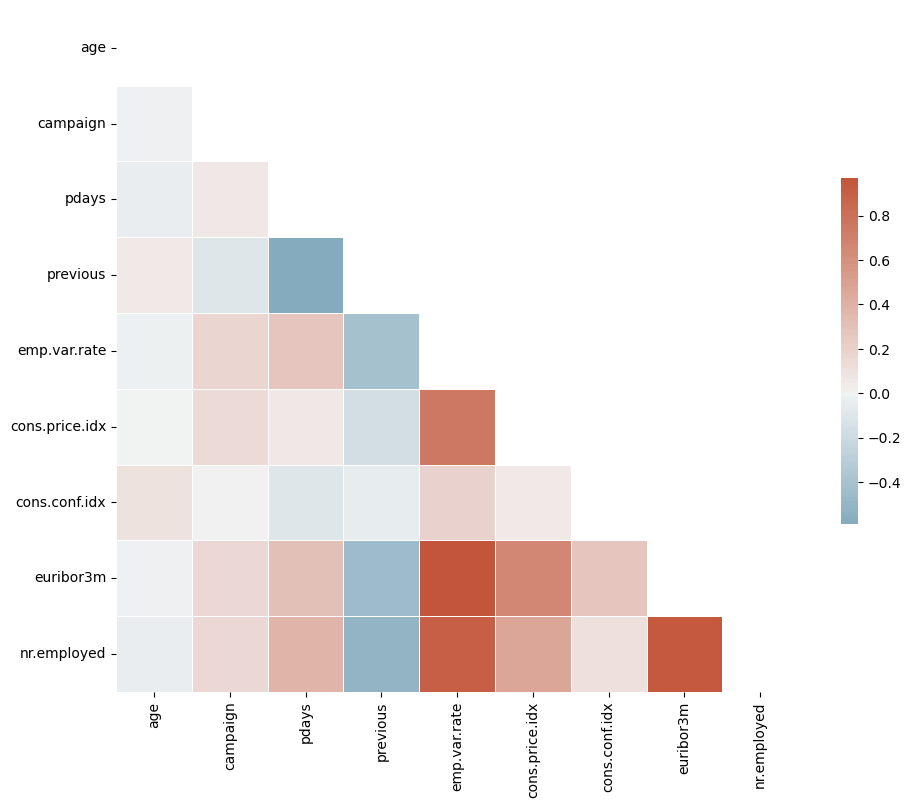

In [10]:
# prikaz korelacione matrice
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [11]:
# mapiranje izlazne varijable na skup {0, 1}
df['y']=df['y'].map({'no':0,'yes':1})

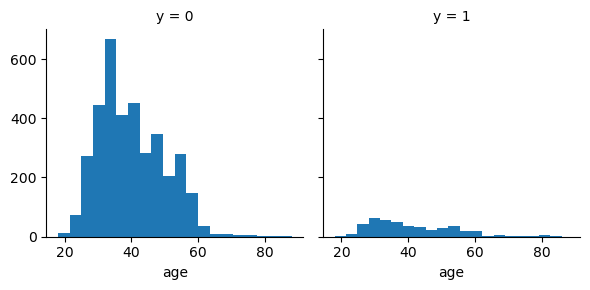

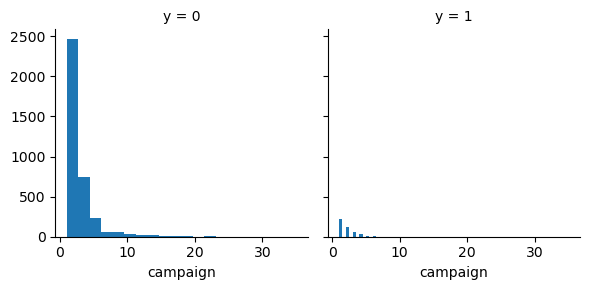

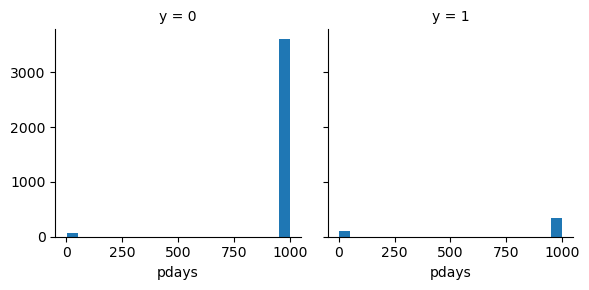

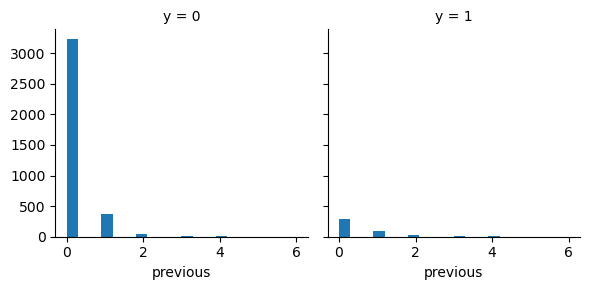

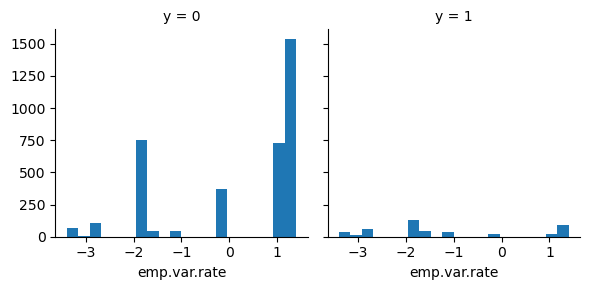

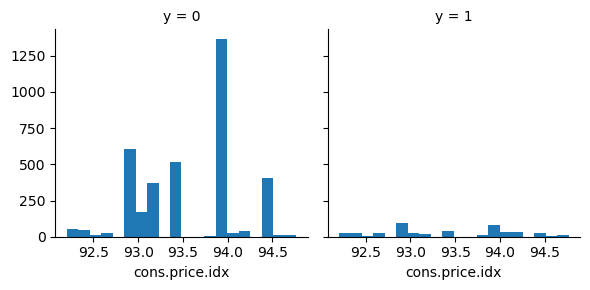

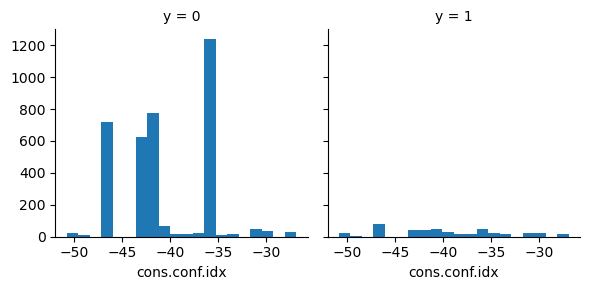

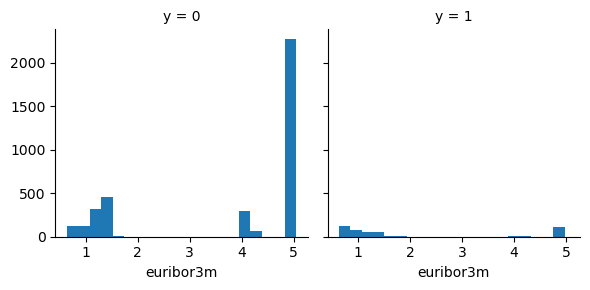

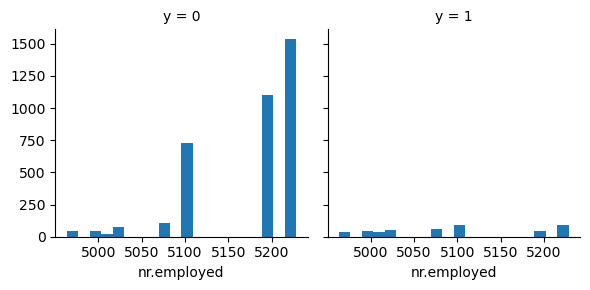

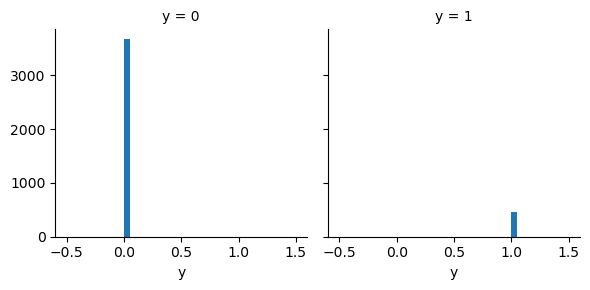

In [12]:
# Vizualizacija podataka

# koristimo stariju verziju matplotliba pa ako se ovo zanemari imacemo upozorenje da napravimo promene
import warnings
warnings.filterwarnings('ignore')

for column in df.select_dtypes(include=['int64','float64']).columns.tolist():
    g = sns.FacetGrid(df, col='y')
    g.map(plt.hist, column, bins=20)

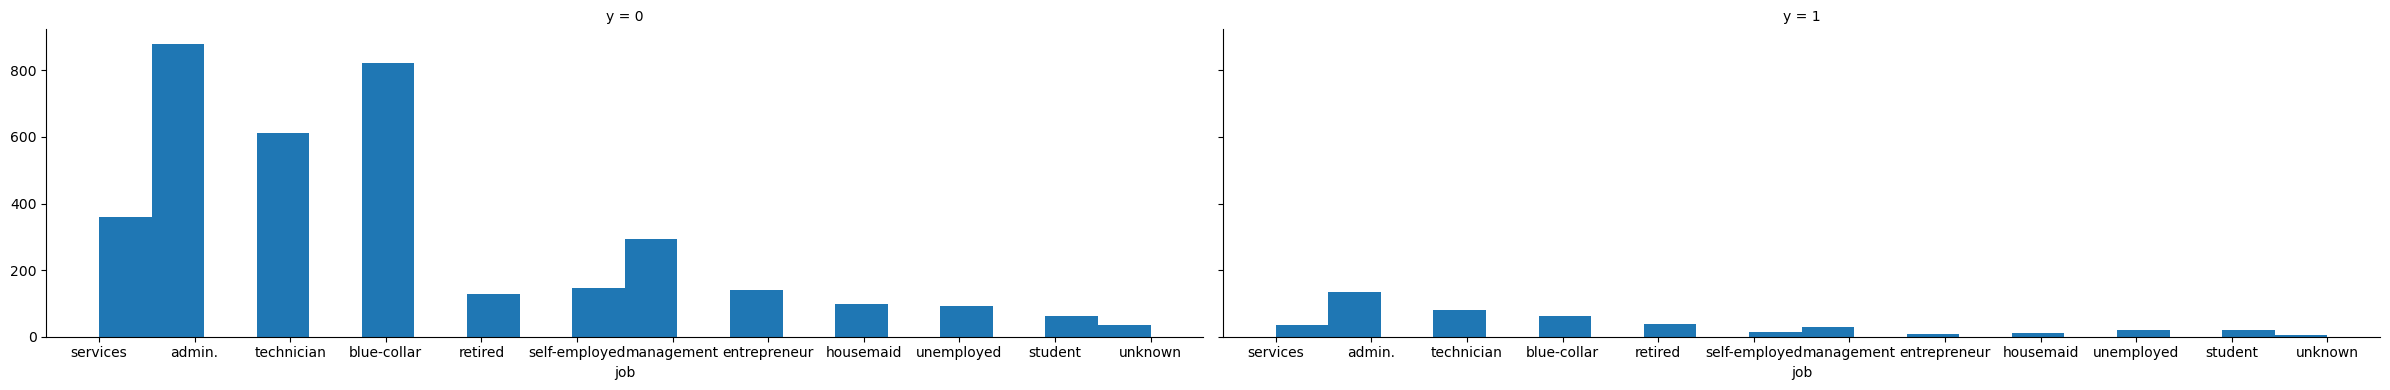

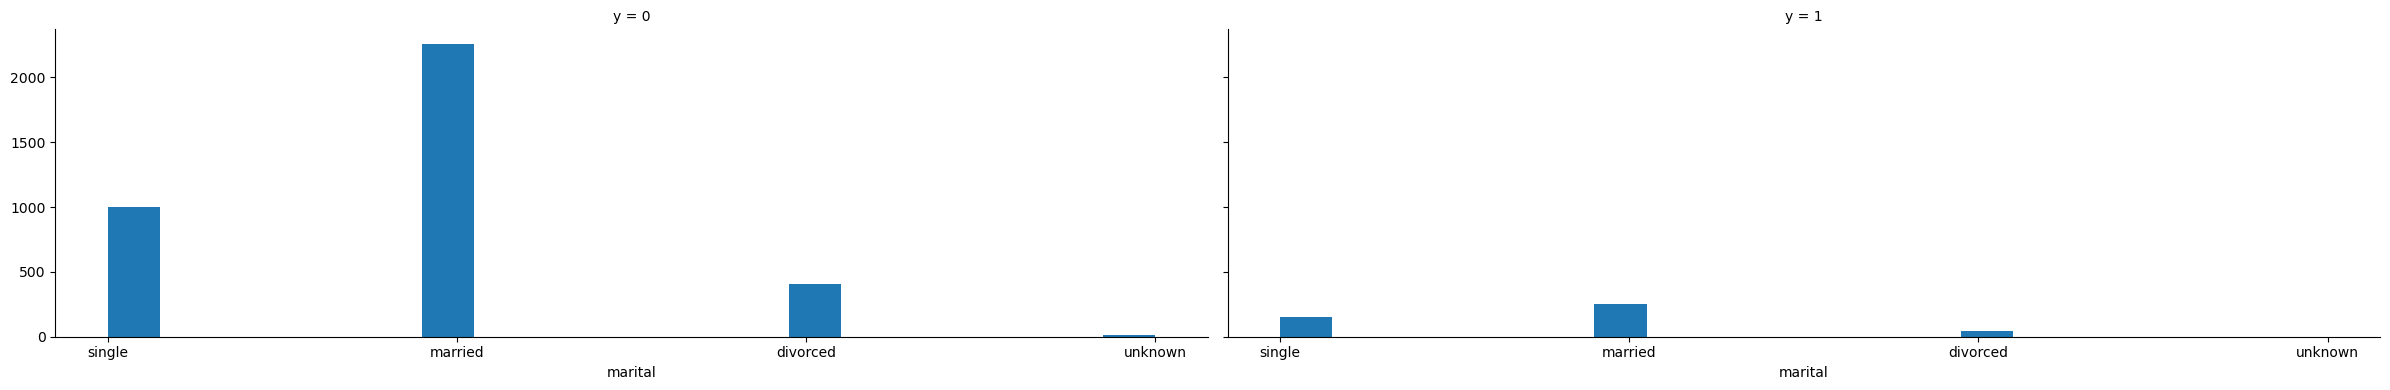

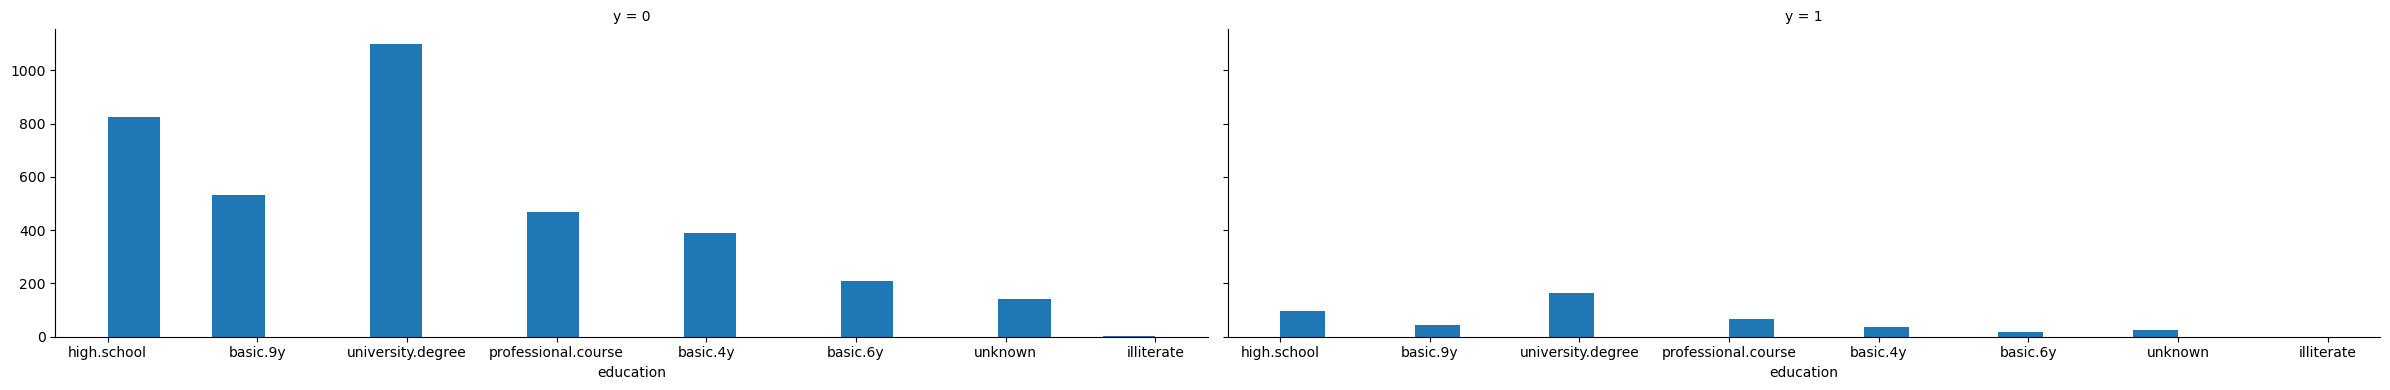

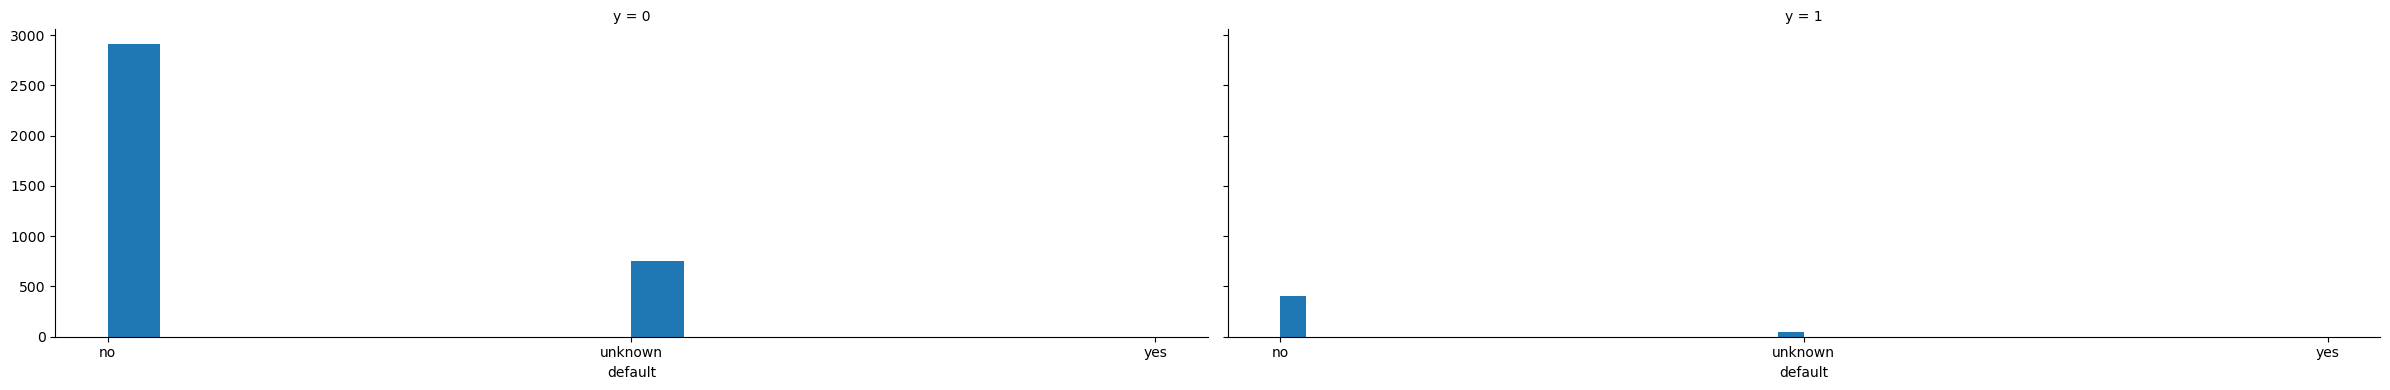

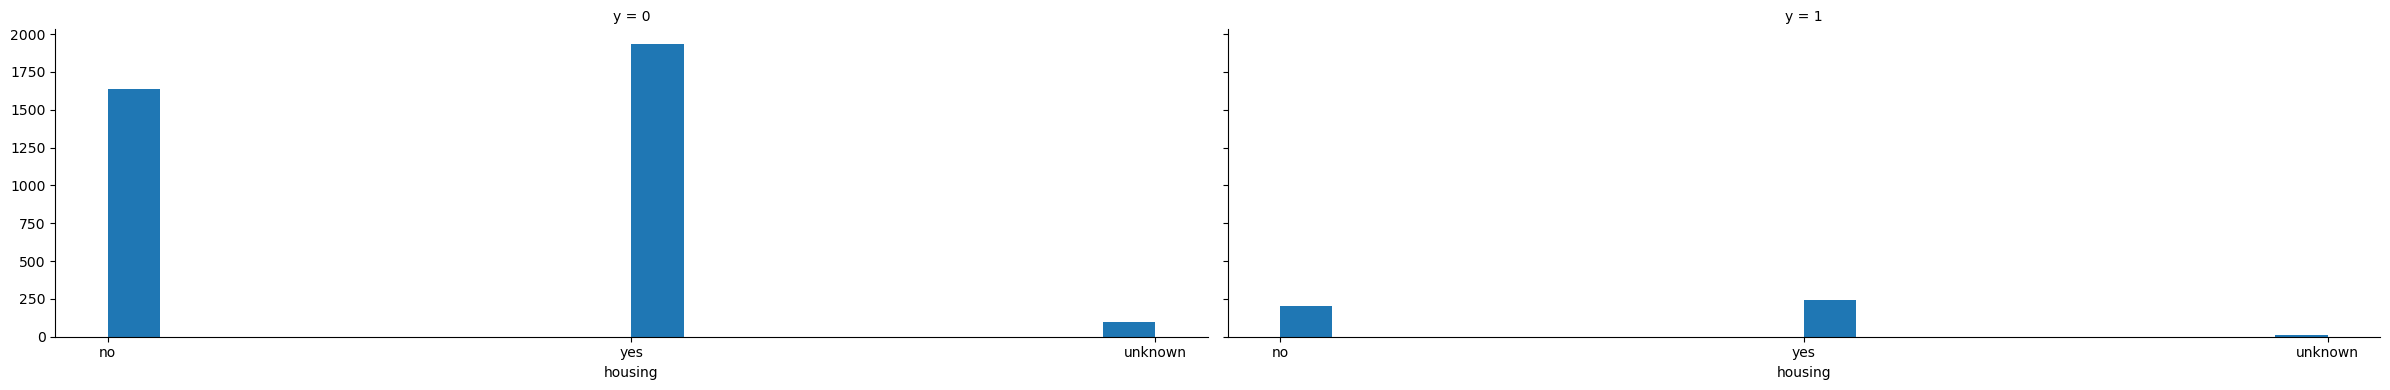

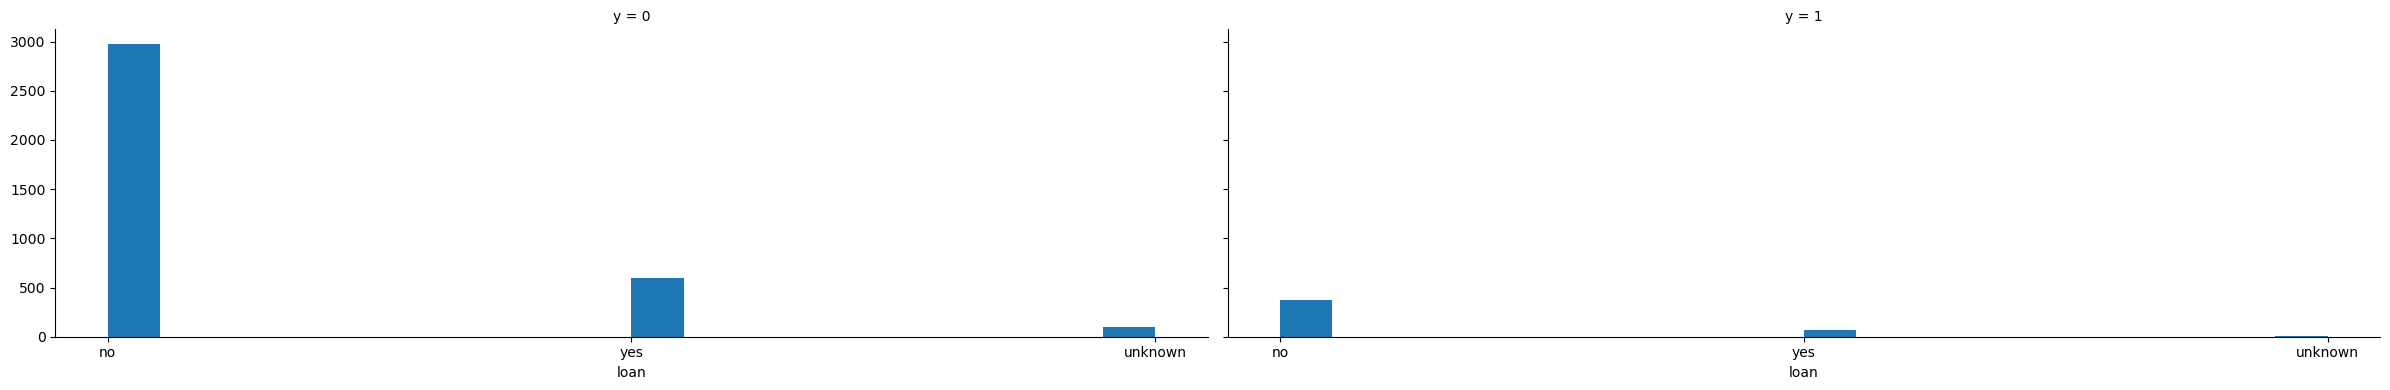

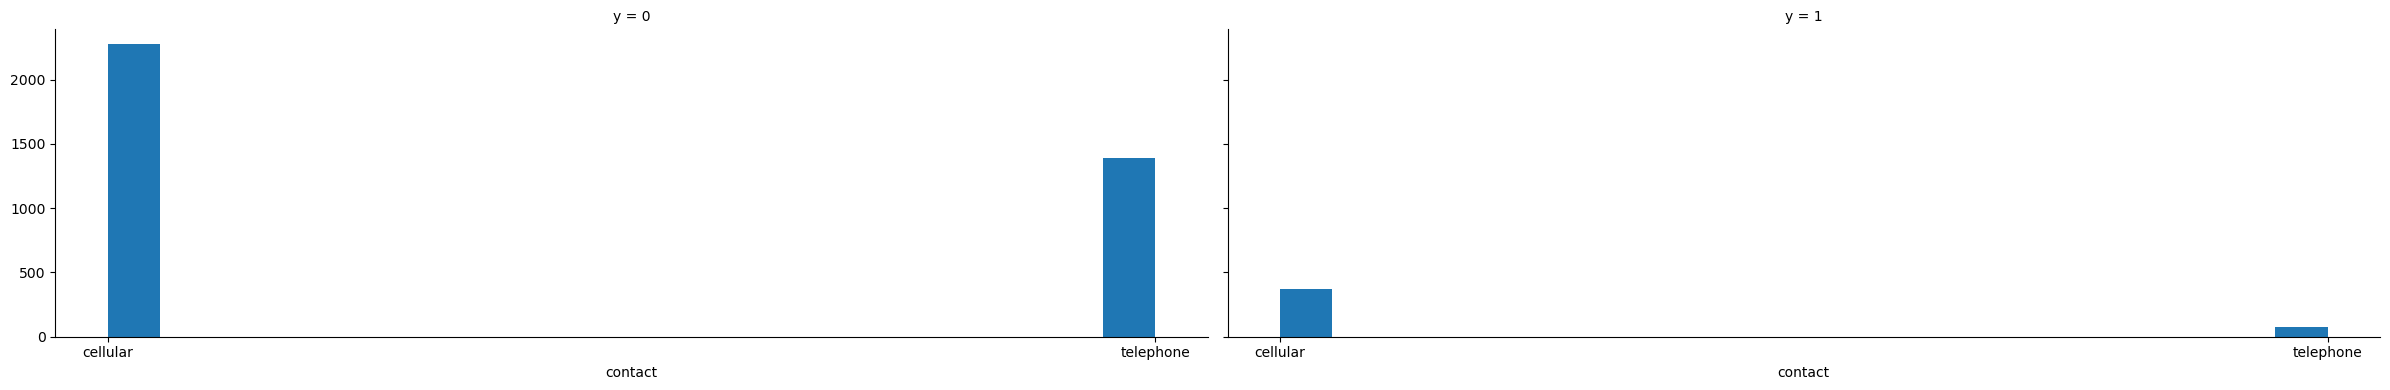

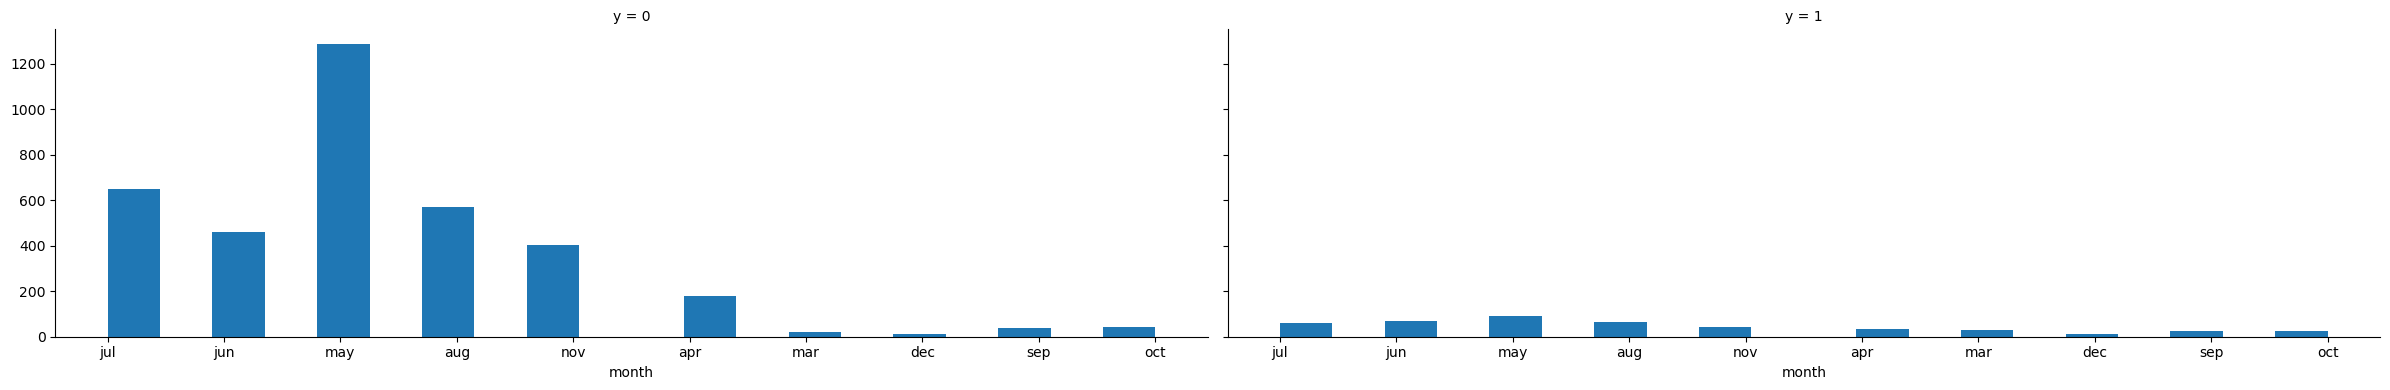

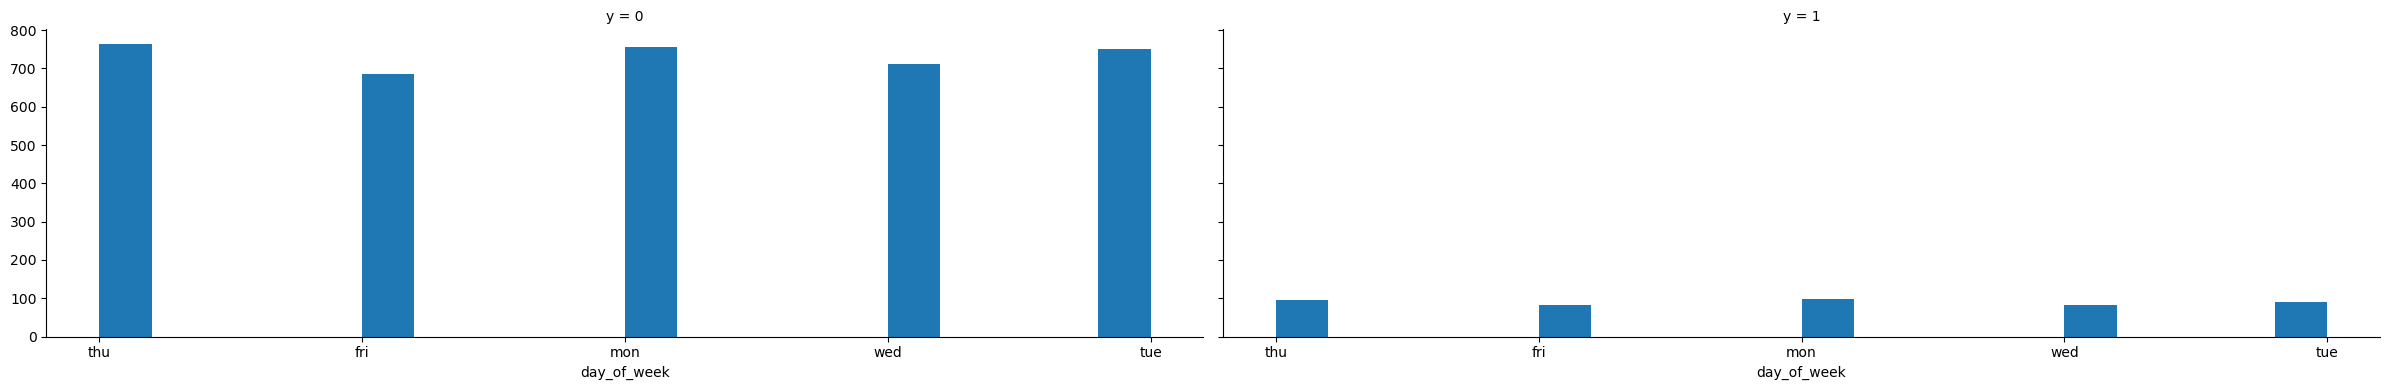

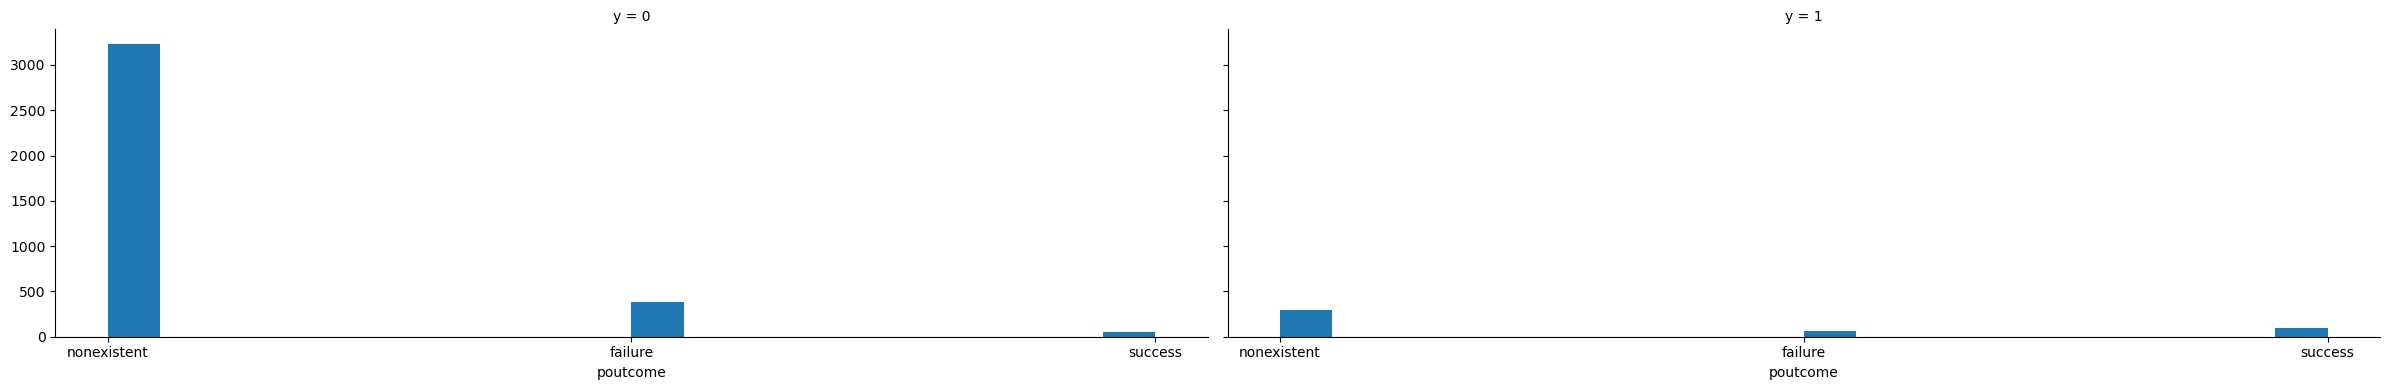

In [13]:
for column in df.select_dtypes(exclude=['int64','float64']).columns.tolist():
    g = sns.FacetGrid(df, col='y', height=4, aspect=3)
    g.map(plt.hist, column, bins=20)

### 3. Priprema skupa podataka za predvidjanje 

In [14]:
# sredjivanje nedostajucih vrednosti
df['nr.employed'] = df['nr.employed'].fillna((df['nr.employed'].mode()[0]))
df['campaign'] = df['campaign'].fillna(np.mean(df['campaign']))
df['previous'] = df['previous'].fillna(np.mean(df['previous']))
df['emp.var.rate'] = df['emp.var.rate'].fillna(np.mean(df['emp.var.rate']))
df['cons.price.idx'] = df['cons.price.idx'].fillna(np.mean(df['cons.price.idx']))
df['cons.conf.idx'] = pd.to_numeric(df['cons.conf.idx'], errors='coerce')
df['cons.conf.idx'] = df['cons.conf.idx'].fillna(np.mean(df['cons.conf.idx']))
df['euribor3m'] = df['euribor3m'].fillna(np.mean(df['euribor3m']))
df.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [15]:
# pivotiranje tabela
for column in df.select_dtypes(exclude=['int64','float64']).columns.tolist():
    print('*'*5, column, '*'*5)
    print(df[[column, 'y']].groupby([column], as_index=False).mean().sort_values(by='y', ascending=False))
    print()

***** job *****
              job         y
8         student  0.231707
5         retired  0.228916
10     unemployed  0.171171
0          admin.  0.131423
9      technician  0.115774
11        unknown  0.102564
3       housemaid  0.100000
4      management  0.092593
7        services  0.089059
6   self-employed  0.081761
1     blue-collar  0.069005
2    entrepreneur  0.054054

***** marital *****
    marital         y
2    single  0.134432
1   married  0.100438
0  divorced  0.096413
3   unknown  0.090909

***** education *****
             education         y
7              unknown  0.155689
6    university.degree  0.130538
5  professional.course  0.121495
3          high.school  0.105320
0             basic.4y  0.088578
2             basic.9y  0.074913
1             basic.6y  0.074561
4           illiterate  0.000000

***** default *****
   default         y
0       no  0.121267
1  unknown  0.061021
2      yes  0.000000

***** housing *****
   housing         y
2      yes  0.110345
0

In [16]:
df_oh_encoded = pd.get_dummies(df, prefix=['job'], columns=['job'], drop_first=True)

In [17]:
df_oh_encoded = pd.get_dummies(df_oh_encoded, prefix=['marital'], columns=['marital'], drop_first=True)
df_oh_encoded = pd.get_dummies(df_oh_encoded, prefix=['education'], columns=['education'], drop_first=True)
df_oh_encoded = pd.get_dummies(df_oh_encoded, prefix=['default'], columns=['default'], drop_first=True)
df_oh_encoded = pd.get_dummies(df_oh_encoded, prefix=['housing'], columns=['housing'], drop_first=True)
df_oh_encoded = pd.get_dummies(df_oh_encoded, prefix=['loan'], columns=['loan'], drop_first=True)
df_oh_encoded = pd.get_dummies(df_oh_encoded, prefix=['contact'], columns=['contact'], drop_first=True)
df_oh_encoded = pd.get_dummies(df_oh_encoded, prefix=['month'], columns=['month'], drop_first=True)
df_oh_encoded = pd.get_dummies(df_oh_encoded, prefix=['day_of_week'], columns=['day_of_week'], drop_first=True)
df_oh_encoded = pd.get_dummies(df_oh_encoded, prefix=['poutcome'], columns=['poutcome'], drop_first=True)
df_oh_encoded

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,31,35.000000,999,0.0,1.4,93.918,-42.7,4.968,5228.1,0,...,False,False,False,False,False,True,False,False,True,False
1,39,29.000000,999,0.0,1.4,93.918,-42.7,4.968,5228.1,0,...,False,False,False,False,False,True,False,False,True,False
2,25,29.000000,999,0.0,1.4,93.918,-42.7,4.968,5228.1,0,...,False,False,False,False,False,True,False,False,True,False
3,29,27.000000,999,0.0,1.4,94.465,-41.8,4.959,5228.1,0,...,False,False,False,False,False,False,False,False,True,False
4,41,24.000000,999,0.0,1.4,94.465,-41.8,4.959,5228.1,0,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4114,53,2.534273,999,0.0,1.1,93.994,-36.4,4.860,5191.0,0,...,True,False,False,False,False,True,False,False,True,False
4115,30,2.534273,999,0.0,1.1,93.994,-36.4,4.858,5191.0,0,...,True,False,False,False,False,False,False,True,True,False
4116,31,2.534273,999,0.0,1.4,93.444,-36.1,4.963,5228.1,0,...,False,False,False,False,True,False,False,False,True,False
4117,47,2.534273,999,0.0,1.1,93.994,-36.4,4.856,5191.0,0,...,True,False,False,False,False,False,False,True,True,False


In [18]:
# kreiranje novog atributa koji pokazuje da li je osoba kontaktirana prethodno ili nije
df_oh_encoded['previous_contact'] = (df_oh_encoded['pdays'] != 999).astype(int)
df_oh_encoded.previous_contact.value_counts()

previous_contact
0    3959
1     160
Name: count, dtype: int64

<Axes: >

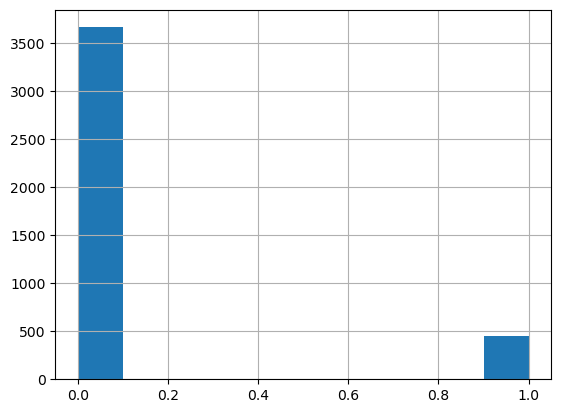

In [19]:
# prikaz nebalansiranog dataseta
df_oh_encoded['y'].hist()

In [20]:
df_oh_encoded.columns.get_loc('y')

9

In [21]:
df_oh_encoded.to_csv('data/df_oh_encoded.csv', index=False)